## About this tutorial 

In my post about [the 1-neuron network: logistic regression](https://thedatafrog.com/logistic-regression/), we have built  a very simple neural network with only one neuron to classify a 1D sample in two categories, and we saw that this network is equivalent to a logistic regression. We also learnt about the sigmoid activation function. 

Today, we're going to perform the same exercise in 2D, and you will learn that: 

* the logistic regression can work in 2D as well, and in more dimensions;
* the logistic regression is **a linear algorithm**;
* it is often necessary to add **non-linearities** to be able to describe the dataset, and thus to go beyond the logistic regression. 

**Prerequisites**

Before following this tutorial, you should:

* know about the 1D linear regression, or follow [this tutorial](https://thedatafrog.com/logistic-regression)
* [install Anaconda](https://thedatafrog.com/install-anaconda-data-science-python/), if not already done.

As usual, first download and open this notebook:

* [download the repository containing this notebook](https://github.com/cbernet/maldives/archive/master.zip)
* unzip it, say to `Downloads/maldives-master`
* launch a jupyter notebook from the anaconda navigator
* in the notebook, navigate to `Downloads/maldives-master/one_neuron`
* open `logistic_regression_2d.ipynb`

In the notebook, import the needed packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# in this tutorial, we will generate our samples ourselves, 
# with nsamples in each category
nexamples = 500

## Dataset creation

Let's create a sample of examples with two values x1 and x2, with two categories. 
For category 0, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width sqrt(s2) = 1 along both directions. For category 1, the Gaussian is centered on (2,2).

In [2]:
normal = np.random.multivariate_normal

s2 = 1
sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nexamples)
sgx1 = normal([2.,2.], [[s2, 0.], [0.,s2]], nexamples)
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

Here is a scatter plot for the examples in the two categories

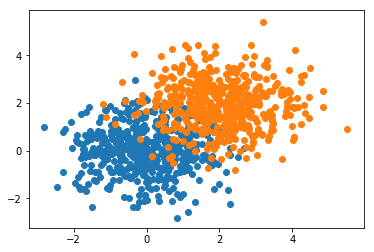

In [3]:
plt.scatter(sgx0[:,0], sgx0[:,1])
plt.scatter(sgx1[:,0], sgx1[:,1])

Our goal will be to classify (x1,x2) points in one of the two categories. To do that, we need to build a single sample containing the examples from the two categories. So we concatenate the arrays of points, and also the arrays of targets for later use:

In [4]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))

print sgx.shape, sgy.shape

(1000, 2) (1000,)


## The 2D sigmoid function 

The sigmoid or logistic function is essential in binary classification problem. It is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like in 1D:

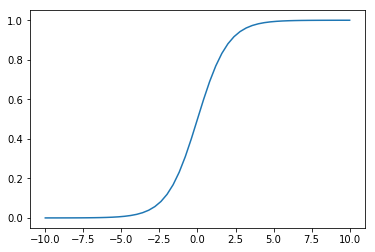

In [5]:
# define parameters
b = 0
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

In 2D, the expression of the sigmoid remains the same, but $z$ is now a function of the two variables $x_1$ and $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

And here is what the sigmoid looks like in the $(x_1, x_2)$ plane:

In [6]:
# define parameters
b = 0
w1 = 1
w2 = 2

def sigmoid_2d(x1, x2):
    # z is a linear function of x1
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

To see what this function looks like, we can make a 2D plot, with x1 on the horizontal axis, x2 on the vertical axis, and the value of the sigmoid represented as a color for each (x1, x2) coordinate. To do that, we will use a standard matplotlib technique, that I'd like to explain in details. 

First create an array of evenly spaced values along x1, and another array along x2: 

In [7]:
xmin, xmax, npoints = (-10,10,51)
linx1 = np.linspace(xmin,xmax,npoints)
linx2 = linx1

Then, we create a meshgrid from these arrays: 

In [8]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
print gridx1.shape, gridx2.shape
print 'gridx1:'
print gridx1 
print 'gridx2'
print gridx2

(51, 51) (51, 51)
gridx1:
[[-10.   -9.6  -9.2 ...   9.2   9.6  10. ]
 [-10.   -9.6  -9.2 ...   9.2   9.6  10. ]
 [-10.   -9.6  -9.2 ...   9.2   9.6  10. ]
 ...
 [-10.   -9.6  -9.2 ...   9.2   9.6  10. ]
 [-10.   -9.6  -9.2 ...   9.2   9.6  10. ]
 [-10.   -9.6  -9.2 ...   9.2   9.6  10. ]]
gridx2
[[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.6  -9.6  -9.6 ...  -9.6  -9.6  -9.6]
 [ -9.2  -9.2  -9.2 ...  -9.2  -9.2  -9.2]
 ...
 [  9.2   9.2   9.2 ...   9.2   9.2   9.2]
 [  9.6   9.6   9.6 ...   9.6   9.6   9.6]
 [ 10.   10.   10.  ...  10.   10.   10. ]]


if you take the first line in both arrays, and scan the values on this line, you get: `(-10,-10), (-9.6, 10), (-9.2, 10)`... So we are scanning the x1 coordinates sequentially at the bottom of the plot. If you take the second line, you get: `(-10, -9.6), (-9.6, -9.6), (-9.2, -9.6)` ... : we are scanning the second line at the bottom of the plot, after moving up in x2 from one step. 

Scanning the full grid, you would scan the whole plot sequentially. 

Now we need to compute the value of the sigmoid for each pair (x1,x2) in the grid. That's very easy to do: 

In [10]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

numpy applies its magic and calls the `sigmoid_2d` function to each pair `(x1,y2)` taken from the `gridx1` and `gridx2` arrays. 

Finally, we can plot our sigmoid in 2D: 

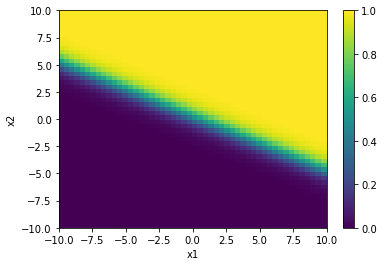

In [11]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

The 2D sigmoid has the same kind of rising edge as the 1D sigmoid, but in 2D. 
With the parameters defined above: 

* The weight of $x_2$ is twice larger than the weight of $x_1$, so the sigmoid evolves twice faster as a function of $x_2$. If you set one of the weights to zero, can you guess what will happen? try it in the cell above. 
* The separation boundary, which occurs for $z=0$, is a straight line with equation $w_1 x_1 + w_2 x_2 + b = 0$ or equivalently: 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$

For the record, if you prefer, you can plot the sigmoid in 3D like this:  


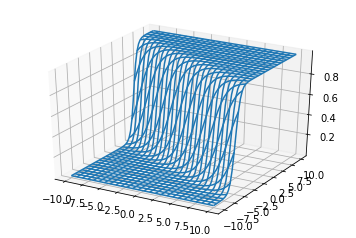

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(gridx1,gridx2,z)

## Logistic regression

Let's now perform a logistic regression in 2D to separate the two classes of samples. 

We take the logistic regression algorithm from scikit-learn. 
Here, the logistic regression is used with the `lbfgs` solver. LBFGS is a minimization method used to find the best parameters for the logistic function. It is similar to [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), if you know it. If not no worries, I'll cover minimization techniques in a future post. 

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(sgx, sgy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

The logistic regression has been fitted (trained) to the data. Now, we can use it to predict a probability for a given (x1,x2) point.

We would like to plot this probability in 2D as a function of x1 and x2. To do that, we need to use the `clf.predic_proba` method which takes a 2D array of shape `(n_points, 2)`. The first dimension indexes the points, and the second one contains the values of x1 and x2. Again, we use our grid to map the (x1,x2) plane. But the gridx1 and gridx2 arrays defined above contain disconnected values of x1 and x2: 

In [14]:
print gridx1.shape, gridx2.shape

(51, 51) (51, 51)


What we want is a 2D array of shape (npoints, 2), not two 2D arrays of shape (51, 51)... 
We need to reshape our data. First, we will flatten the gridx1 and gridx2 arrays so that all their values appear sequentially in a 1D array. Here is a small example to show how flatten works: 

In [15]:
a = np.array([[0, 1], [2, 3]])
print a 
print 'flat array:', a.flatten()

[[0 1]
 [2 3]]
flat array: [0 1 2 3]


Then, we will stitch the two 1D arrays together with np.c_ like this: 

In [16]:
b = np.array([[4, 5], [6, 7]])
print a.flatten()
print b.flatten()
c = np.c_[a.flatten(), b.flatten()]
print c
print c.shape

[0 1 2 3]
[4 5 6 7]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
(4, 2)


This array has exactly the shape expected by `clf.predict_proba`: a list of examples with two values. So let's do the same with our grid, and let's compute the probabilities for all (x1,x2) pairs in the grid:

In [17]:
grid = np.c_[gridx1.ravel(), gridx2.ravel()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

Now, prob does not have the right shape to be plotted. In the cell below, we will use a gridx1 and a gridx2 array with shapes (51,51). The shape of the prob array must be consistent, as the plotting method will simply map each (x1,x2) pair to a probability. So we need to reshape our probability array to shape (51,51). Reshaping works like this:

In [18]:
d = np.array([0,1,2,3])
print d
print 'reshaped to (2,2):'
print d.reshape(2,2)

[0 1 2 3]
reshaped to (2,2):
[[0 1]
 [2 3]]


Finally (!) we can do our plot:

Text(0,0.5,'x2')

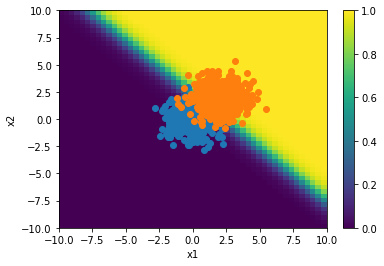

In [19]:
plt.pcolor(gridx1,gridx2,prob[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(sgx0[:,0], sgx0[:,1])
plt.scatter(sgx1[:,0], sgx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')


💡 **This kind of numpy reshaping operations might seem a bit convoluted. But these operations are very efficient, and I can assure you that you actually get used to it. Always check the shape of your arrays and stay strong!**

In conclusion for this section, we see that the logistic regression is able to separate these two classes well. 

But what about more complicated sample distributions? 

## A non linear problem 

Let's build a more complicated sample:

In [21]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)

In [23]:
# stacking the x1, x2 values
# into an array of shape (500, 2)
# (all examples)
srx = np.column_stack((x1, x2))
# select examples for category 0
srx0 = srx[x1*x2>=0]
# select examples for category 1
srx1 = srx[x1*x2<0]

Text(0,0.5,'x2')

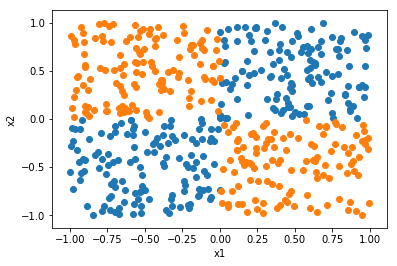

In [24]:
plt.scatter(srx0[:,0],srx0[:,1])
plt.scatter(srx1[:,0],srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Obviously, we cannot draw a line separating these two samples accurately, so the logistic regression is going to be of no use. 

**This is a non-linear problem**. 

To be able to deal with non-linearities, the classification boundary must be a non-linear function of the inputs x1 and x2. This means that the weighted input of the last sigmoid neuron must be a non-linear function of these variables. 

To do that, we have two solutions: 

1. change variables, which requires some insights on the dataset
1. use a more complex model, like a neural network with one or more hidden layers. 

## Changing variables

We're first going to try and change variables. Looking at the plot above (and also at the code used to generate the examples!), we see that the sample categorization depends on the product $x_1 x_2$.

Indeed, For the first sample, ($x_1 > 0$ and $x_2 > 0$), or ($x_1 < 0$ and $x_2 < 0$). So the product $x_1 x_2$ is always positive. For the second sample, it's always negative. 

So instead of considering $x_1$ and $x_2$ separately, we can work with $u = x_1 x_2$. 

We build the examples as a function of $u$:

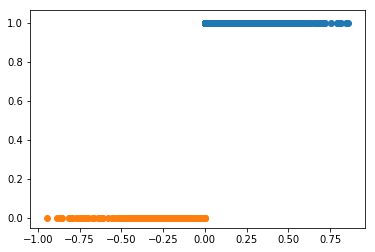

In [25]:
# category 0: 
sru0 = srx0[:,0] * srx0[:,1]
sry0 = np.ones(len(sru0))
# category 1: 
sru1 = srx1[:,0] * srx1[:,1]
sry1 = np.zeros(len(sru1))
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

And we can do a simple logistic regression: 

In [26]:
sru = np.concatenate((sru0, sru1))
sru = np.c_[sru]
sry = np.concatenate((sry0, sry1))
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sru, sry)

We first plot the results as a function of u: 

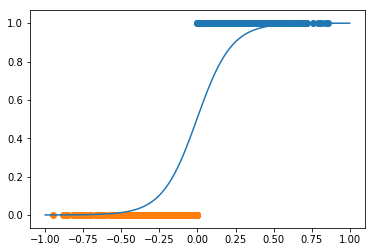

In [27]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

And now, we plot the result a function of $x1$ and $x2$

In [42]:
xmin, xmax, npoints = -1, 1, 100
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = clf.predict_proba(us)
probs[:,1].shape

(10000,)

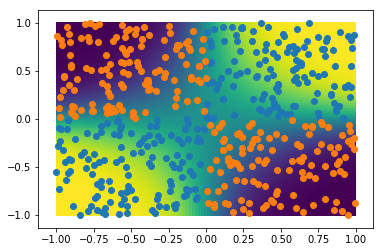

In [43]:
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.scatter(srx0[:,0], srx0[:,1])
plt.scatter(srx1[:,0], srx1[:,1])

This works in this simple case, but: 

* the relation between the two variables can be very complicated, and difficult to infer.
* this becomes a nightmare in more than two dimensions...

The solution is to make a more complex model, able to adapt to such non-linearities all by itself. 

## Neural networks with hidden layers: a non-linear classifier 

We're now going to build a simple neural network to classify our samples. 

But first, we need to merge the examples in the two categories into a single sample for training: 


In [50]:
srx = np.concatenate((srx0,srx1))
sry = np.concatenate((sry0,sry1))

The neural network will be an MLPClassifier from scikit-learn, with a single hidden layer containing 50 neurons (remember: always start small). 

For these neurons, we use a ReLU activation function, which almost always works well for neurons in hidden layers.
You can try and replace it with a logistic (sigmoid) activation later on if you want. Learning is an iterative process, and the default number of iterations of 200 was not enough to let it converge. So I increased this number to 10000. 

In [72]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu', max_iter=10000)

mlp.fit(srx,sry)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

To evaluate the performance of the network, we need to build a test sample, just like we did for the training sample:

In [73]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)
x = np.column_stack((x1, x2))
xt0 = x[x1*x2>0]
xt1 = x[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))
print xt.shape

(500, 2)


In [74]:
from sklearn.metrics import accuracy_score
predictions = mlp.predict(xt)
accuracy_score(yt, predictions)

0.99

The performance seems excellent! Let's plot the classification probability in 2D, together with the test sample:

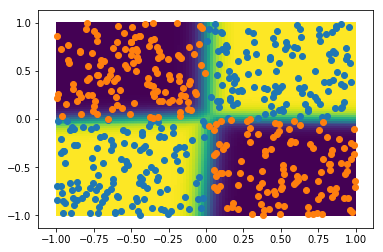

In [75]:
grid = np.c_[gridx1.ravel(), gridx2.ravel()]
probs = mlp.predict_proba(grid)
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.scatter(xt0[:,0], xt0[:,1])
plt.scatter(xt1[:,0], xt1[:,1])


This simple neural network does a great job at capturing the non-linearities of this dataset. 

Now [let's go back and wrap up!]()